### Aprendendo o básico sobre análise explanatória de dados, utilizando Python com Numpy, Matplotlib, and Pandas.
https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Cleaning


In [ ]:
data= pd.read_csv("marketing_analysis.csv", skiprows = 2, low_memory=False)
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


**Drop the customer id as it is of no use.**

**Extract job  & Education in newly from "jobedu" column.**

**Drop the "jobedu" column from the dataframe.**

In [ ]:
data.drop("customerid", axis = 1, inplace = True)

data['job'] = data['jobedu'].apply(lambda x: x.split(',')[0])
data['education'] = data['jobedu'].apply(lambda x: x.split(',')[1])

data.drop('jobedu', axis = 1, inplace = True)

In [ ]:
data.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [ ]:
data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

**Dropping the records with values missing in data dataframe.**

**Checking the missing values in the dataset.**

In [ ]:
data = data[~data.age.isnull()].copy()

month_mode = data.month.mode()[0]
data.month.fillna(month_mode, inplace = True)

data = data[~data.response.isnull()].copy()

data.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

### Univariate Analysis

#### Categorical Unordered Univariate Analysis

In [ ]:
data.job.value_counts(normalize=True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

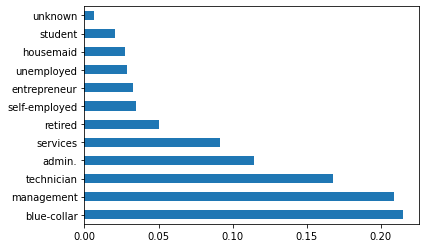

In [ ]:
data.job.value_counts(normalize=True).plot.barh()
plt.show()

#### Categorical Ordered Univariate Analysis

Ordered variables are those variables that have a natural rank of order.

Month: Jan, Feb, March……

Education: Primary, Secondary,……

In [ ]:
#calculate the percentage of each education category.
data.education.value_counts(normalize=True)

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

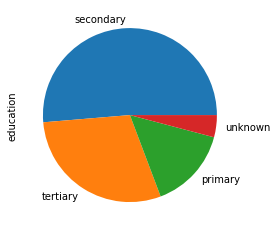

In [ ]:
#plot the pie chart of education categories
data.education.value_counts(normalize=True).plot.pie()
plt.show()

### Bivariate Analysis

#### Scatter Plot

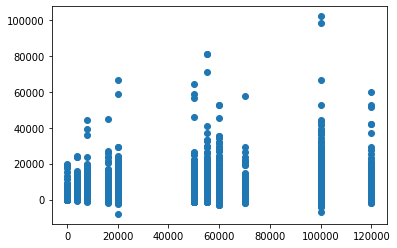

In [ ]:
#plot the scatter plot of balance and salary variable in data
plt.scatter(data.salary,data.balance)
plt.show()

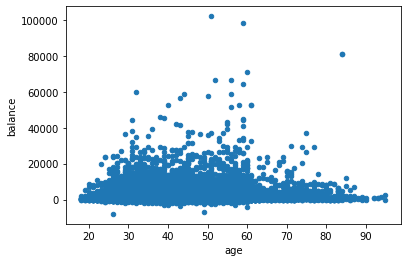

In [ ]:
#plot the scatter plot of balance and age variable in data
data.plot.scatter(x="age",y="balance")
plt.show()

#### Pair Plot

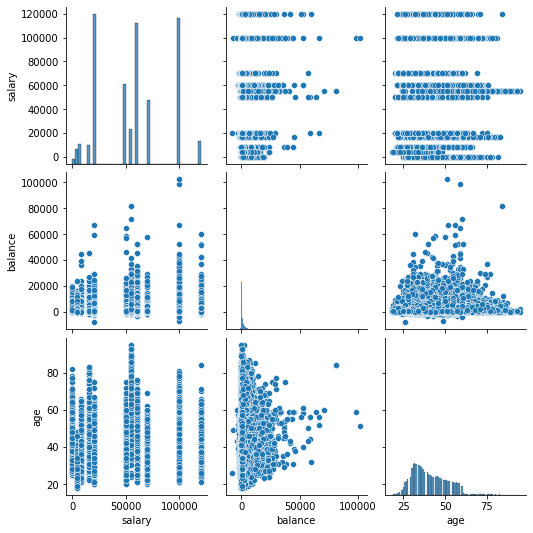

In [ ]:
#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data = data, vars=['salary','balance','age'])
plt.show()

#### Correlation Matrix

In [ ]:
# Creating a matrix using age, salry, balance as rows and columns
data[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024513,0.097710
salary,0.024513,1.000000,0.055489
balance,0.097710,0.055489,1.000000


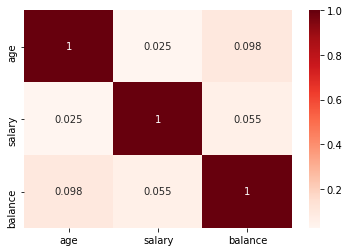

In [ ]:
#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(data[['age','salary','balance']].corr(), annot=True, cmap = 'Reds')

#### Numeric - Categorical Analysis

In [ ]:
data.groupby('response')['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

In [ ]:
data.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [ ]:
data.groupby('response')['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
response,,,,,,,,
no,39876.0,56769.510482,32063.960597,0.0,20000.0,60000.0,70000.0,120000.0
yes,5285.0,58780.510880,32213.905247,0.0,50000.0,60000.0,100000.0,120000.0


#### Categorical Analysis

In [ ]:
#create response_rate of numerical data type where response "yes"= 1, "no"= 0
data['response_rate'] = np.where(data.response=='yes',1,0)
data.response_rate.value_counts()

0    39876
1     5285
Name: response_rate, dtype: int64

In [ ]:
data.response_rate.describe()

count    45161.000000
mean         0.117026
std          0.321455
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: response_rate, dtype: float64

In [ ]:
data.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,response_rate
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary,0
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary,0
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary,0
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown,0
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown,0


In [ ]:
#plot the bar graph of marital status with average value of response_rate
data.groupby('marital')['response_rate'].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_rate, dtype: float64

### Multivariate Analysis

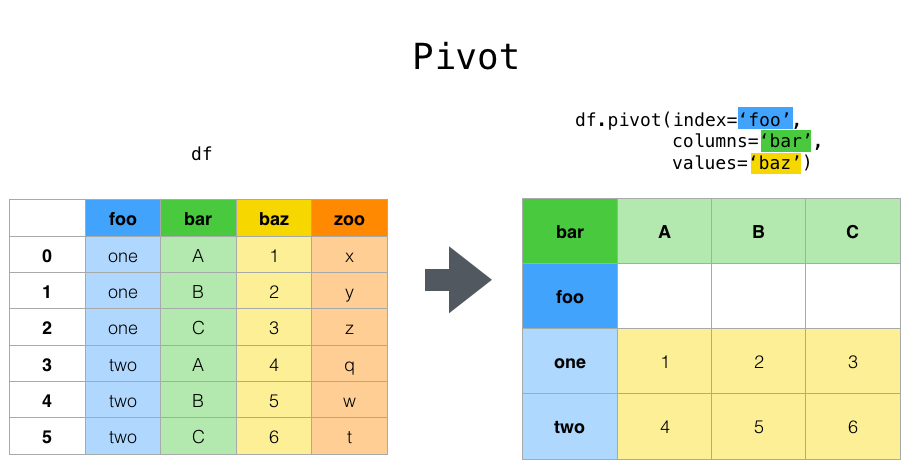

In [ ]:
result = pd.pivot_table(data=data, index='education', columns='marital',values='response_rate')
print(result)

marital    divorced   married    single
education                              
primary    0.138852  0.075601  0.106808
secondary  0.103559  0.094650  0.129271
tertiary   0.137415  0.129835  0.183737
unknown    0.142012  0.122519  0.162879


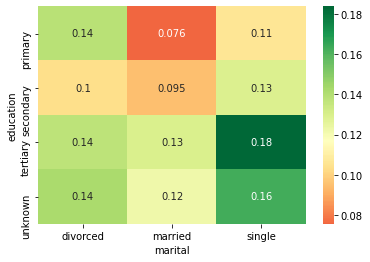

In [ ]:
#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()